<a href="https://colab.research.google.com/github/probml/pyprobml/blob/master/notebooks/ae_mnist_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoders



In [ ]:
import tensorflow as tf
from tensorflow import keras


In [ ]:
# Standard Python libraries
import os
import time
import numpy as np
import glob
import matplotlib as mpl
import matplotlib.pyplot as plt
import PIL



In [ ]:
np.random.seed(123)
tf.random.set_seed(123)


(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

# Partition training into train and valid
X_train_full = train_images
y_train_full = train_labels

X_train, X_valid = X_train_full[:-6000], X_train_full[-6000:]
y_train, y_valid = y_train_full[:-6000], y_train_full[-6000:]


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Vanilla AE MLP

In [ ]:


def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")


def show_reconstructions(model, images=X_valid, n_images=10):
    reconstructions = model.predict(images[:n_images])
    plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(images[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])


In [ ]:

stacked_encoder = keras.models.Sequential(
    [
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(32, activation="relu"),
    ]
)
stacked_decoder = keras.models.Sequential(
    [
        keras.layers.Dense(128, activation="relu", input_shape=[32]),
        keras.layers.Dense(28 * 28, activation="sigmoid"),
        keras.layers.Reshape([28, 28]),
    ]
)
stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])

stacked_encoder.summary()
stacked_decoder.summary()

stacked_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.5))
history = stacked_ae.fit(X_train, X_train, epochs=1, validation_data=(X_valid, X_valid))

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           4,128 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,608 (408.62 KB)

 Trainable params: 104,608 (408.62 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 784)                 │         101,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 28, 28)              │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 105,360 (411.56 KB)

 Trainable params: 105,360 (411.56 KB)

 Non-trainable params: 0 (0.00 B)

1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.4066 - val_loss: 0.3348


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


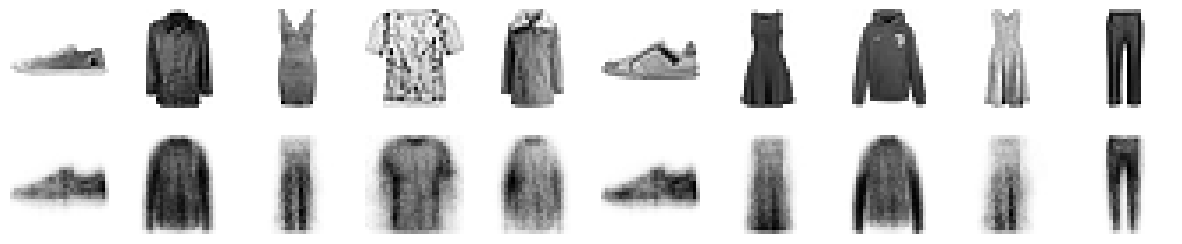

In [ ]:
show_reconstructions(stacked_ae)

## 1) Implement an AutoEncoder by adding Bernoulli dropout noise in an encoder layer

```
# This is formatted as code
```



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 0.2991 - val_loss: 0.2624
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 0.2591 - val_loss: 0.2563
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.2555 - val_loss: 0.2545
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2538 - val_loss: 0.2536
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.2528 - val_loss: 0.2529
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.2521 - val_loss: 0.2523
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2517 - val_loss: 0.2518
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.2512 - val_loss: 0.2516
Epoch 9/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.2510 - val_loss: 0.2514
Epoch 10/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.2508 - val_loss: 0.2512
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 652ms/step


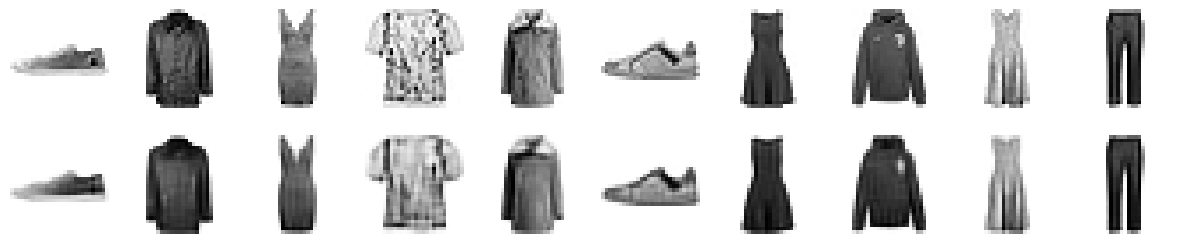

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Dropout, Flatten, Dense, Reshape
import numpy as np
import matplotlib.pyplot as plt

# Load Fashion MNIST dataset
(train_images, _), (test_images, _) = keras.datasets.fashion_mnist.load_data()
train_images = train_images / 255.0
train_images = np.expand_dims(train_images, axis=-1)
test_images = test_images / 255.0
test_images = np.expand_dims(test_images, axis=-1)

# Split train into train and validation
X_train, X_valid = train_images[:-6000], train_images[-6000:]

# Encoder with Bernoulli Dropout
encoder = keras.models.Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), padding='same'),
    Dropout(0.3),  # Bernoulli dropout
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
])

# Decoder
decoder = keras.models.Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(7, 7, 64)),
    UpSampling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(1, (3, 3), activation='sigmoid', padding='same'),
])

# Autoencoder
autoencoder = keras.models.Sequential([encoder, decoder])
autoencoder.compile(optimizer=keras.optimizers.Adam(), loss='binary_crossentropy')

# Train
history = autoencoder.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

# Function to visualize reconstructions
def show_reconstructions(model, images=X_valid, n_images=10):
    reconstructions = model.predict(images[:n_images])
    plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plt.imshow(images[image_index].squeeze(), cmap="binary")
        plt.axis("off")
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plt.imshow(reconstructions[image_index].squeeze(), cmap="binary")
        plt.axis("off")
    plt.show()

# Show output
show_reconstructions(autoencoder)


## 2) Implement an Sparse AutoEncoder using KL Regularisation

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: -35.4249 - val_loss: -55.5606
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: -57.8745 - val_loss: -64.2868
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: -65.7978 - val_loss: -70.6574
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: -71.9040 - val_loss: -76.1447
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: -77.2390 - val_loss: -81.0544
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: -82.0065 - val_loss: -85.3778
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: -86.1833 - val_loss: -89.0985
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: -89.7599 - val_loss: -92.2415
Epoch 9/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: -92.7744 - val_loss: -94.8885
Epoch 10/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: -95.3034 - val_loss: -97.1247
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


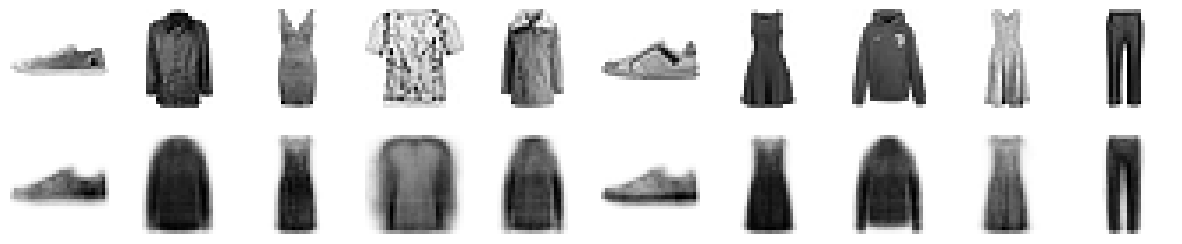

In [ ]:
# Sparse Autoencoder with KL Regularization
from tensorflow.keras import backend as K

# KL Divergence Loss for Sparsity
rho = 0.05  # Target average activation
def kl_divergence_loss(p, p_hat):
    return p * K.log(p / (p_hat + 1e-10)) + (1 - p) * K.log((1 - p) / (p_hat + 1e-10))

def sparse_loss(p_hat, beta=0.1):
    return beta * K.sum(kl_divergence_loss(rho, p_hat))

# Custom Loss Callback
class KLDivergenceRegularizer(keras.regularizers.Regularizer):
    def __init__(self, beta=0.1):
        self.beta = beta

    def __call__(self, x):
        p_hat = K.mean(x, axis=0)
        return sparse_loss(p_hat, self.beta)

# Sparse Autoencoder Model
sparse_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(128, activation="relu", activity_regularizer=KLDivergenceRegularizer(beta=0.1)),
    keras.layers.Dense(64, activation="relu"),
])

sparse_decoder = keras.models.Sequential([
    keras.layers.Dense(128, activation="relu", input_shape=[64]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28]),
])

sparse_autoencoder = keras.models.Sequential([sparse_encoder, sparse_decoder])

sparse_autoencoder.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.001))

history = sparse_autoencoder.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

show_reconstructions(sparse_autoencoder)

In [ ]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

# Partition training and validation sets
X_train_full = train_images
y_train_full = train_labels

X_train, X_valid = X_train_full[:-6000], X_train_full[-6000:]
y_train, y_valid = y_train_full[:-6000], y_train_full[-6000:]


import tensorflow as tf
from tensorflow import keras
import numpy as np

# Ensure reproducibility
np.random.seed(123)
tf.random.set_seed(123)

# KL Divergence for Sparse Autoencoder
rho = 0.05

def kl_divergence_loss(p, p_hat):
    return p * tf.math.log(p / (p_hat + 1e-10)) + (1 - p) * tf.math.log((1 - p) / (p_hat + 1e-10))

class KLDivergenceRegularizer(keras.regularizers.Regularizer):
    def __init__(self, beta=0.1):
        self.beta = beta

    def __call__(self, x):
        p_hat = tf.reduce_mean(x, axis=0)  # Average activation
        return self.beta * tf.reduce_sum(kl_divergence_loss(rho, p_hat))

# Function to Build and Train the Autoencoders
def train_autoencoder(model_type, params, X_train, X_valid, epochs=5):
    encoder_layers = [keras.layers.Input(shape=(28, 28)), keras.layers.Flatten()]

    for _ in range(params["num_layers"]):
        if model_type == "dropout":
            encoder_layers.append(keras.layers.Dense(params["num_neurons"], activation=params["activation"]))
            encoder_layers.append(keras.layers.Dropout(params["dropout_rate"]))
        elif model_type == "sparse":
            encoder_layers.append(keras.layers.Dense(params["num_neurons"], activation=params["activation"],
                                                     activity_regularizer=KLDivergenceRegularizer(params["kl_beta"])))

    encoder = keras.Sequential(encoder_layers)

    decoder = keras.Sequential([
        keras.layers.Input(shape=(params["num_neurons"],)),
        keras.layers.Dense(params["num_neurons"], activation=params["activation"]),
        keras.layers.Dense(28 * 28, activation="sigmoid"),
        keras.layers.Reshape([28, 28]),
    ])

    autoencoder = keras.Sequential([encoder, decoder])

    # Compile the model
    optimizer = keras.optimizers.Adam(learning_rate=params["learning_rate"])
    autoencoder.compile(loss="binary_crossentropy", optimizer=optimizer)

    # Train and capture history
    history = autoencoder.fit(X_train, X_train, epochs=epochs,
                              validation_data=(X_valid, X_valid),
                              batch_size=params["batch_size"], verbose=0)

    return min(history.history["val_loss"]), params

# Hyperparameters to Tune
hyperparameters = {
    "num_neurons": [128, 256],
    "num_layers": [2, 3],
    "batch_size": [64, 128],
    "activation": ["relu", "tanh"],
    "learning_rate": [0.001, 0.01],
    "dropout_rate": [0.3, 0.5],    # For Dropout Autoencoder
    "kl_beta": [0.05, 0.1]         # For Sparse Autoencoder
}

# Perform Grid Search for Best Hyperparameters
best_dropout_loss, best_dropout_config = float("inf"), {}
best_sparse_loss, best_sparse_config = float("inf"), {}

for neurons in hyperparameters["num_neurons"]:
    for layers in hyperparameters["num_layers"]:
        for batch in hyperparameters["batch_size"]:
            for activation in hyperparameters["activation"]:
                for lr in hyperparameters["learning_rate"]:

                    # Train Dropout Autoencoder
                    for dropout in hyperparameters["dropout_rate"]:
                        loss, config = train_autoencoder("dropout", {
                            "num_neurons": neurons,
                            "num_layers": layers,
                            "batch_size": batch,
                            "activation": activation,
                            "learning_rate": lr,
                            "dropout_rate": dropout
                        }, X_train, X_valid)
                        if loss < best_dropout_loss:
                            best_dropout_loss, best_dropout_config = loss, config

                    # Train Sparse Autoencoder
                    for kl_beta in hyperparameters["kl_beta"]:
                        loss, config = train_autoencoder("sparse", {
                            "num_neurons": neurons,
                            "num_layers": layers,
                            "batch_size": batch,
                            "activation": activation,
                            "learning_rate": lr,
                            "kl_beta": kl_beta
                        }, X_train, X_valid)
                        if loss < best_sparse_loss:
                            best_sparse_loss, best_sparse_config = loss, config

# Print the Best Configurations
print("Best Dropout Autoencoder Loss: ", best_dropout_loss)
print("Best Dropout Autoencoder Config: ", best_dropout_config)
print("\nBest Sparse Autoencoder Loss: ", best_sparse_loss)
print("Best Sparse Autoencoder Config: ", best_sparse_config)


Best Dropout Autoencoder Loss:  0.28480294346809387
Best Dropout Autoencoder Config:  {'num_neurons': 256, 'num_layers': 2, 'batch_size': 64, 'activation': 'tanh', 'learning_rate': 0.001, 'dropout_rate': 0.3}

Best Sparse Autoencoder Loss:  -835.8827514648438
Best Sparse Autoencoder Config:  {'num_neurons': 256, 'num_layers': 3, 'batch_size': 64, 'activation': 'relu', 'learning_rate': 0.01, 'kl_beta': 0.1}


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


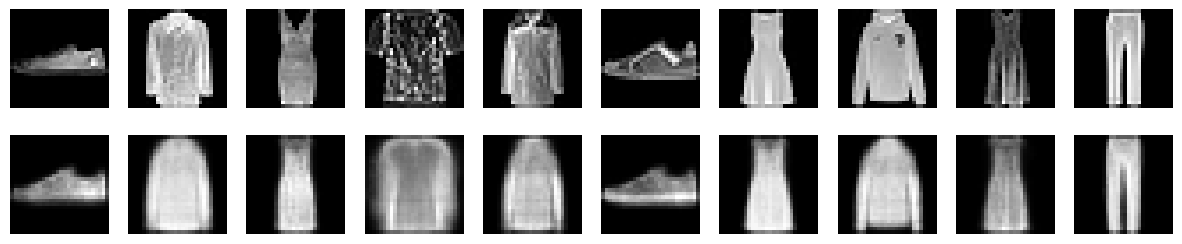

In [ ]:
# Select 10 sample images from the validation set
sample_images = X_valid[:10]

# Get latent vectors from the encoder
latent_vectors = sparse_encoder.predict(sample_images)

# Add small Gaussian noise to the latent vectors
noise = np.random.normal(loc=0.0, scale=0.1, size=latent_vectors.shape)
perturbed_latent_vectors = latent_vectors + noise

# Reconstruct images using the perturbed latent vectors
reconstructed_images = sparse_decoder.predict(perturbed_latent_vectors)

# Plot original and perturbed reconstructed images
def plot_images(original, reconstructed, n_images=10):
    plt.figure(figsize=(n_images * 1.5, 3))
    for i in range(n_images):
        # Original Image
        plt.subplot(2, n_images, i + 1)
        plt.imshow(original[i], cmap="gray")
        plt.axis("off")

        # Perturbed Reconstruction
        plt.subplot(2, n_images, i + 1 + n_images)
        plt.imshow(reconstructed[i], cmap="gray")
        plt.axis("off")

    plt.show()

plot_images(sample_images, reconstructed_images)